<a href="https://colab.research.google.com/github/kacp-i/BCU-Work/blob/main/Y2%20S2%20CMP5366%20-%20Data%20Management%20and%20Machine%20Learning%20Operations/Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Imports

In [ ]:
# importing libraries used throughout the training & model
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')

from scipy.stats import skewnorm

# libraries used for encoding data for the dataset, training different models and evaluating each model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [ ]:
# mounting the google drive - can comment this out and use the upload feature below
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# grab the csv file from the google drive
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S2 Assessment/S4 Dataset.csv', encoding='cp1252')

In [ ]:
# alternative upload method to google drive
# from google.colab import files
# file = files.upload()

#Exploring the dataset

In [ ]:
# shows the first 5 rows of the dataset & the column headers
ds.head()

,Zone,Country,ISO3,Year,Population,Fortification,PCDEA,MDI,Tagname,Micronutrient,Units,Estimated Intake,Requirements,Prevalence of Inadequate Intake
0,WCANA,Afghanistan,AFG,1961,8954000.0,0,2997,0.773239,VITC,Vitamin C,mg,0.040922,0.049955,62.746266
1,WCANA,Afghanistan,AFG,1961,8954000.0,0,2997,0.773239,ZN,Zinc,mg,0.001677,0.001770,58.326559
2,WCANA,Afghanistan,AFG,1961,8954000.0,0,2997,0.773239,VITA_RAE,Vitamin A,mcg,0.000275,0.000463,84.225561
3,WCANA,Afghanistan,AFG,1961,8954000.0,0,2997,0.773239,CA,Calcium,mg,0.700043,0.783092,63.814563
4,WCANA,Afghanistan,AFG,1961,8954000.0,0,2997,0.773239,CU,Copper,mcg,0.001979,0.000569,0.090734


In [ ]:
# shows all of the columns and their datatype and how many non-null cells they have
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111818 entries, 0 to 111817
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Zone                             111818 non-null  object 
 1   Country                          111818 non-null  object 
 2   ISO3                             111818 non-null  object 
 3   Year                             111818 non-null  int64  
 4   Population                       111818 non-null  float64
 5   Fortification                    111818 non-null  int64  
 6   PCDEA                            111818 non-null  int64  
 7   MDI                              111818 non-null  float64
 8   Tagname                          111818 non-null  object 
 9   Micronutrient                    111818 non-null  object 
 10  Units                            111818 non-null  object 
 11  Estimated Intake                 111818 non-null  float64
 12  Re

**Describing the Columnns:**

- Zone: Differnet zones of the world
- Country: Country name
- ISO3: 3 letter country codes
- Year: The year of the data collected
- Population: Population of the country at the time (rounded)
- Fortification: The amount of micronutrient fortified
- PCDEA: Per capita daily energy availability
- MDI: Micronutrient Density Index
- Tagname: Abbreviation of the micronutrient name
- Micronutrient: Name of micronutrient
- Units: Units of measurement of micronutrient
- Estimated Intake: The estimated intake for that micronutrient
- Requirements: The required amount of micronutrient
- Prevalence of Inadequate Intake: Amount of micronutrient missing

# Abstracting the data

In [ ]:
# showing the dataset information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111818 entries, 0 to 111817
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Zone                             111818 non-null  object 
 1   Country                          111818 non-null  object 
 2   ISO3                             111818 non-null  object 
 3   Year                             111818 non-null  int64  
 4   Population                       111818 non-null  float64
 5   Fortification                    111818 non-null  int64  
 6   PCDEA                            111818 non-null  int64  
 7   MDI                              111818 non-null  float64
 8   Tagname                          111818 non-null  object 
 9   Micronutrient                    111818 non-null  object 
 10  Units                            111818 non-null  object 
 11  Estimated Intake                 111818 non-null  float64
 12  Re

In [ ]:
# dropping useless columns
ds = ds.drop(['Zone','ISO3','Fortification','Tagname'], axis=1)

# these columns are being dropped due to the lack of meaningful data inside of them

In [ ]:
# checking for null values across the dataset
ds.isnull().sum()

,0
Country,0
Year,0
Population,0
PCDEA,0
MDI,0
Micronutrient,0
Units,0
Estimated Intake,0
Requirements,0
Prevalence of Inadequate Intake,0


# Data Manipulation

In [ ]:
# describing the dataset pre-encoding (only shows numerical columns)
ds.describe()

,Year,Population,PCDEA,MDI,Estimated Intake,Requirements,Prevalence of Inadequate Intake
count,111818.000000,1.118180e+05,111818.000000,111818.000000,1.118180e+05,111818.000000,111818.000000
mean,1987.357957,3.213830e+07,2554.610617,0.876117,1.850885e-01,0.126062,22.594240
std,15.056880,1.168775e+08,519.696366,0.080869,3.841114e-01,0.253932,29.927245
min,1961.000000,3.400000e+04,1306.000000,0.589982,2.840000e-07,0.000002,0.000000
25%,1974.000000,1.874000e+06,2145.000000,0.822961,9.352988e-04,0.000586,0.220511
50%,1988.000000,6.638000e+06,2491.000000,0.883027,2.255188e-03,0.001400,6.186188
75%,2001.000000,2.049600e+07,2965.000000,0.949317,9.530613e-02,0.051874,38.036844
max,2011.000000,1.399292e+09,3829.000000,1.000000,2.488589e+00,0.902559,99.999523


In [ ]:
# checking which columns need to be converted from object datatype to int datatype
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111818 entries, 0 to 111817
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Country                          111818 non-null  object 
 1   Year                             111818 non-null  int64  
 2   Population                       111818 non-null  float64
 3   PCDEA                            111818 non-null  int64  
 4   MDI                              111818 non-null  float64
 5   Micronutrient                    111818 non-null  object 
 6   Units                            111818 non-null  object 
 7   Estimated Intake                 111818 non-null  float64
 8   Requirements                     111818 non-null  float64
 9   Prevalence of Inadequate Intake  111818 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 8.5+ MB


In this case its all the columns with a different datatype than int64 or float64

- Country
- Micronutrient
- Units

# Country Column Encoding

In [ ]:
# checking the values and their amounts in the column
ds['Country'].value_counts()

,count
Country,
Afghanistan,728
Angola,728
Albania,728
United Arab Emirates,728
Argentina,728
...,...
Turkmenistan,294
Slovakia,280
Czech Republic,280


In [ ]:
# creating a variable for the encoder
lblMake = LabelEncoder()

# grab each unique variable from the column and turn it into its numerical version
lblMake.fit(ds['Country'].drop_duplicates())

# create a new column and apply the encoding values
ds['countryEncoded'] = lblMake.transform(ds['Country'])

In [ ]:
# checking which numerical value corresponds to the non-numerical value
ds[['Country', 'countryEncoded']].value_counts()

,,count
Country,countryEncoded,
Afghanistan,0,728
Albania,1,728
Algeria,2,728
Angola,3,728
Antigua and Barbuda,4,728
...,...,...
Russia,124,294
Slovakia,134,280
Czech Republic,37,280


In [ ]:
# create a new file to hold
# as there are too many unique values to show as an output - you can reference the .txt file
# when using user predictions
makeFile = open("country.txt", "w")

# write the non-numerical and numerical values to a text file
makeFile.write(ds[['Country', 'countryEncoded']].to_string())

# close the file to save it
makeFile.close()

In [ ]:
# dropping the old column from the dataset as it is unnecessary
ds = ds.drop('Country', axis=1)

# Micronutrient Column Encoding

In [ ]:
# checking the values and their amounts in the column
ds['Micronutrient'].value_counts()

,count
Micronutrient,
Vitamin C,7987
Zinc,7987
Vitamin A,7987
Calcium,7987
Copper,7987
Riboflavin,7987
Phosphorus,7987
Vitamin B6,7987
Vitamin B12,7987


In [ ]:
# creating a variable for the encoder
lblMake = LabelEncoder()

# grab each unique variable from the column and turn it into its numerical version
lblMake.fit(ds['Micronutrient'].drop_duplicates())

# create a new column and apply the encoding values
ds['micronutrientEncoded'] = lblMake.transform(ds['Micronutrient'])

In [ ]:
# checking which numerical value corresponds to the non-numerical value
ds[['Micronutrient', 'micronutrientEncoded']].value_counts()

,,count
Micronutrient,micronutrientEncoded,
Calcium,0,7987
Copper,1,7987
Folate,2,7987
Iron,3,7987
Magnesium,4,7987
Niacin,5,7987
Phosphorus,6,7987
Riboflavin,7,7987
Thiamin,8,7987


In [ ]:
# dropping the old column from the dataset as it is unnecessary
ds = ds.drop('Micronutrient', axis=1)

# Units Column Encoding

In [ ]:
# checking the values and their amounts in the column
ds['Units'].value_counts()

,count
Units,
mg,79870
mcg,31948


In [ ]:
# creating a variable for the encoder
lblMake = LabelEncoder()

# grab each unique variable from the column and turn it into its numerical version
lblMake.fit(ds['Units'].drop_duplicates())

# create a new column and apply the encoding values
ds['unitsEncoded'] = lblMake.transform(ds['Units'])

In [ ]:
# checking which numerical value corresponds to the non-numerical value
ds[['Units', 'unitsEncoded']].value_counts()

,,count
Units,unitsEncoded,
mg,1,79870
mcg,0,31948


In [ ]:
# dropping the old column from the dataset as it is unnecessary
ds = ds.drop('Units', axis=1)

# Final Check

In [ ]:
# checking each columns datatype
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111818 entries, 0 to 111817
Data columns (total 10 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Year                             111818 non-null  int64  
 1   Population                       111818 non-null  float64
 2   PCDEA                            111818 non-null  int64  
 3   MDI                              111818 non-null  float64
 4   Estimated Intake                 111818 non-null  float64
 5   Requirements                     111818 non-null  float64
 6   Prevalence of Inadequate Intake  111818 non-null  float64
 7   countryEncoded                   111818 non-null  int64  
 8   micronutrientEncoded             111818 non-null  int64  
 9   unitsEncoded                     111818 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 8.5 MB


In [ ]:
# describing the dataset
ds.describe()

,Year,Population,PCDEA,MDI,Estimated Intake,Requirements,Prevalence of Inadequate Intake,countryEncoded,micronutrientEncoded,unitsEncoded
count,111818.000000,1.118180e+05,111818.000000,111818.000000,1.118180e+05,111818.000000,111818.000000,111818.000000,111818.000000,111818.000000
mean,1987.357957,3.213830e+07,2554.610617,0.876117,1.850885e-01,0.126062,22.594240,84.364092,6.500000,0.714286
std,15.056880,1.168775e+08,519.696366,0.080869,3.841114e-01,0.253932,29.927245,48.758288,4.031147,0.451756
min,1961.000000,3.400000e+04,1306.000000,0.589982,2.840000e-07,0.000002,0.000000,0.000000,0.000000,0.000000
25%,1974.000000,1.874000e+06,2145.000000,0.822961,9.352988e-04,0.000586,0.220511,43.000000,3.000000,0.000000
50%,1988.000000,6.638000e+06,2491.000000,0.883027,2.255188e-03,0.001400,6.186188,84.000000,6.500000,1.000000
75%,2001.000000,2.049600e+07,2965.000000,0.949317,9.530613e-02,0.051874,38.036844,126.000000,10.000000,1.000000
max,2011.000000,1.399292e+09,3829.000000,1.000000,2.488589e+00,0.902559,99.999523,169.000000,13.000000,1.000000


# Cleaning Up The Dataset

In [ ]:
# renaming columns to make it more meaningful
ds.rename(columns = {'Year' : 'year',
                     'Population' : 'popu',
                     'Estimated Intake' : 'est intake',
                     'Requirements' : 'req',
                     'Prevalence of Inadequate Intake' : 'prev inadeq intake',
                     'countryEncoded' : 'cntry',
                     'micronutrientEncoded' : 'micro',
                     'unitsEncoded' : 'units'},
          inplace = True)

In [ ]:
# checking if changes have been applied
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111818 entries, 0 to 111817
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                111818 non-null  int64  
 1   popu                111818 non-null  float64
 2   PCDEA               111818 non-null  int64  
 3   MDI                 111818 non-null  float64
 4   est intake          111818 non-null  float64
 5   req                 111818 non-null  float64
 6   prev inadeq intake  111818 non-null  float64
 7   cntry               111818 non-null  int64  
 8   micro               111818 non-null  int64  
 9   units               111818 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 8.5 MB


# Visualisation & Clearing Outliers

In [ ]:
# describing the dataset
ds.describe()

,year,popu,PCDEA,MDI,est intake,req,prev inadeq intake,cntry,micro,units
count,111818.000000,1.118180e+05,111818.000000,111818.000000,1.118180e+05,111818.000000,111818.000000,111818.000000,111818.000000,111818.000000
mean,1987.357957,3.213830e+07,2554.610617,0.876117,1.850885e-01,0.126062,22.594240,84.364092,6.500000,0.714286
std,15.056880,1.168775e+08,519.696366,0.080869,3.841114e-01,0.253932,29.927245,48.758288,4.031147,0.451756
min,1961.000000,3.400000e+04,1306.000000,0.589982,2.840000e-07,0.000002,0.000000,0.000000,0.000000,0.000000
25%,1974.000000,1.874000e+06,2145.000000,0.822961,9.352988e-04,0.000586,0.220511,43.000000,3.000000,0.000000
50%,1988.000000,6.638000e+06,2491.000000,0.883027,2.255188e-03,0.001400,6.186188,84.000000,6.500000,1.000000
75%,2001.000000,2.049600e+07,2965.000000,0.949317,9.530613e-02,0.051874,38.036844,126.000000,10.000000,1.000000
max,2011.000000,1.399292e+09,3829.000000,1.000000,2.488589e+00,0.902559,99.999523,169.000000,13.000000,1.000000


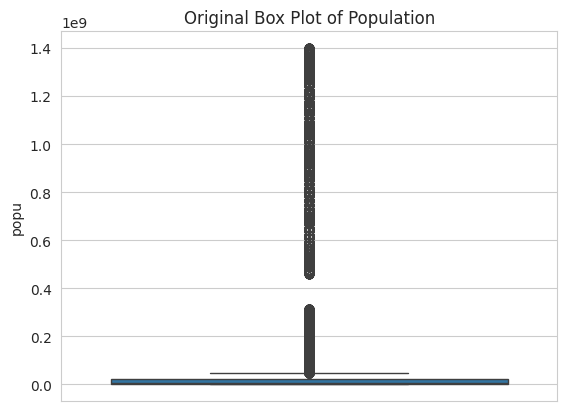

In [ ]:
# checking for outliers in the population column
# as there is a huge difference between the mean and max value
sns.boxplot(ds['popu'])
plt.title('Original Box Plot of Population')
plt.show()

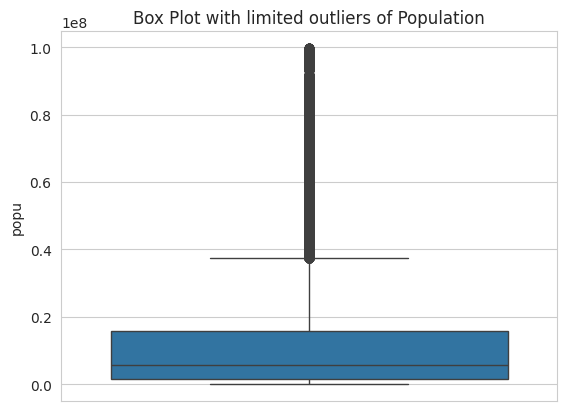

In [ ]:
# adding a threshold to values of the column
removed_outliers = ds[ds['popu'] <= 100000000]

# creating a new boxplot for the column with the threshold applied
sns.boxplot(removed_outliers['popu'])
plt.title('Box Plot with limited outliers of Population')
plt.show()

# Training AI Models

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111818 entries, 0 to 111817
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                111818 non-null  int64  
 1   popu                111818 non-null  float64
 2   PCDEA               111818 non-null  int64  
 3   MDI                 111818 non-null  float64
 4   est intake          111818 non-null  float64
 5   req                 111818 non-null  float64
 6   prev inadeq intake  111818 non-null  float64
 7   cntry               111818 non-null  int64  
 8   micro               111818 non-null  int64  
 9   units               111818 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 8.5 MB


In [ ]:
# selecting the columns to use for training the model
dsLearn = ds[['year',
              'popu',
              'PCDEA',
              'MDI',
              'req',
              'cntry',
              'micro',
              'est intake']]

In [ ]:
# allocating the columns from  to  as x - the data used to predict
x = dsLearn.iloc[:, 0 : -1]

x.head() # checking if the correct columns have been selected

,year,popu,PCDEA,MDI,req,cntry,micro
0,1961,8954000.0,2997,0.773239,0.049955,0,12
1,1961,8954000.0,2997,0.773239,0.001770,0,13
2,1961,8954000.0,2997,0.773239,0.000463,0,9
3,1961,8954000.0,2997,0.773239,0.783092,0,0
4,1961,8954000.0,2997,0.773239,0.000569,0,1


In [ ]:
# allocating the column Value as y - what i am trying to predict
y = dsLearn.iloc[:, -1:, ]

y.head() # checking if the correct columns have been selected

,est intake
0,0.040922
1,0.001677
2,0.000275
3,0.700043
4,0.001979


In [ ]:
# separating the data into test and train data
xTrain, xTest, yTrain, yTest = train_test_split(x, y, random_state=42, test_size=0.2)

# Linear Regression

In [ ]:
# initalise and train the linear regression model
lrModel = LinearRegression()
lrModel.fit(xTrain, yTrain)

# make predictions
yPrediction = lrModel.predict(xTest)

# evaluating the model
mse = mean_squared_error(yPrediction, yTest)
sqrt_mse = np.sqrt(mse)
mae = mean_absolute_error(yPrediction, yTest)
r2 = r2_score(yTest, yPrediction)
coefficient = lrModel.score(xTrain, yTrain)
print(f"MSE : {mse:.3f} \nMSE_SQRT : {sqrt_mse:.3f} \nMAE : {mae:.3f} \nR2 Score : {r2:.3f} \nCoefficient : {coefficient:.3f}")

MSE : 0.029 
MSE_SQRT : 0.170 
MAE : 0.091 
R2 Score : 0.802 
Coefficient : 0.803


In [ ]:
# showing statistics of the model
print("Intercept:", lrModel.intercept_,
      "\nCoeficcient:", lrModel.coef_,
      "\nScore of the training data:", lrModel.score(xTrain, yTrain),
      "\nScore of the test data:", lrModel.score(xTest, yTest))

Intercept: [-0.26082693] 
Coeficcient: [[-6.10423914e-05 -1.91818465e-11  5.63254878e-05  2.24174135e-01
   1.38975379e+00  1.27044116e-05  7.87867571e-03]] 
Score of the training data: 0.8026734710544257 
Score of the test data: 0.8019319054645759


# Decision Tree Regression

In [ ]:
# initialise and train the Decision Tree Regressor model
dtModel = DecisionTreeRegressor(random_state=42)
dtModel.fit(xTrain, yTrain)

# make predictions
y_pred_dt = dtModel.predict(xTest)

# evaluating the model
mse_dt = mean_squared_error(yTest, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae = mean_absolute_error(y_pred_dt, yTest)
r2_dt = r2_score(yTest, y_pred_dt)

print("Decision Tree Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2_dt:.2f}") # shows how much of an impact the independant variables (features) have on the dependant value (prediction)

Decision Tree Regressor Evaluation Metrics:
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
Mean Absolute Error (MAE): 0.01
R-squared (R2 Score): 0.99


In [ ]:
# showing statistics of the model
print("Score of the train data:",
      dtModel.score(xTrain, yTrain),
      "\nScore of the test data:",
      dtModel.score(xTest, yTest))

Score of the train data: 0.9999997132285692 
Score of the test data: 0.9898245469404112


# Random Forest Regression

In [ ]:
# initialise and train the Random Forest Regressor model
rfModel = RandomForestRegressor(random_state=42, n_estimators=100)
rfModel.fit(xTrain, yTrain)

# make predictions
y_pred_rf = rfModel.predict(xTest)

# evaluating the model
mse_rf = mean_squared_error(yTest, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae = mean_absolute_error(y_pred_rf, yTest)
r2_rf = r2_score(yTest, y_pred_rf)

print("Random Forest Regressor Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2_rf:.2f}")

KeyboardInterrupt: 

In [ ]:
# showing statistics of the model
print("Score of the train data:", rfModel.score(xTrain, yTrain),
      "\nScore of the test data:", rfModel.score(xTest, yTest))

# Lasso Regression

In [ ]:
# initialising and fitting the training data onto the model
laModel = Lasso(alpha= 0.4)
laModel.fit(xTrain, yTrain)

# make predictions
yPred = laModel.predict(xTest)

# evaluating the model
mse = round(mean_squared_error(yPred, yTest), 2 )
rmse = np.sqrt(mse)
mae = mean_absolute_error(yPred, yTest)
r2 = r2_score(yPred, yTest)

print('Lasso Regression Evaluation Metrics')
print('Mean Squared Error : ', mse)
print('Root Mean Squared Error',  rmse)
print('Mean Absolute Error : ', mae)
print('R2_Squared  ', r2)

In [ ]:
# showing statistics of the model
print("Score of the train data:", laModel.score(xTrain, yTrain),
      "\nScore of the test data:", laModel.score(xTest, yTest))

# Predictions Using User Input

**The values needed for predicting a value:**
- Year
- Population
- PCDEA
- MDI
- Required Intake
- Country
- Micronutrient

**Values for Country are available in the country.txt file**

**Values for Micronutrient:**
- Calcium	= 0
- Copper = 1
- Folate = 2
- Iron = 3
- Magnesium =	4
- Niacin = 5
- Phosphorus = 6
- Riboflavin = 7
- Thiamin =	8
- Vitamin A =	9
- Vitamin B12 =	10
- Vitamin B6 =	11
- Vitamin C =	12
- Zinc =	13

In [ ]:
# using linear regression to predict the value of a motorbike based on given parameters

val1 = lrModel.predict([
    [2000, 10000000, 2997, 0.7, 0.5, 6, 3] # change variables here to have different values on output
    ])
value1 = val1[0][0]

print(f'Predicted Prevalence of Inadequate Intake = {value1:.2f}')

Predicted Prevalence of Inadequate Intake = 0.66


In [ ]:
# using decision tree regression to predict the value of a motorbike based on given parameters

val2 = dtModel.predict([
    [2500, 125, 111, 1, 1, 1, 2019] # change variables here to have different values on output
    ])
value2 = val2[0]

print(f'Predicted Prevalence of Inadequate Intake = {value2:.2f}')

In [ ]:
# using random forest regression to predict the value of a motorbike based on given parameters

val3 = rfModel.predict([
    [2500, 125, 111, 1, 1, 1, 2019] # change variables here to have different values on output
    ])
value3 = val3[0]

print(f'Predicted Prevalence of Inadequate Intake = {value3:.2f}')

In [ ]:
# using lasso regression to predict the value of a motorbike based on given parameters

val4 = laModel.predict([
    [2500, 125, 111, 1, 1, 1, 2019] # change variables here to have different values on output
    ])
value4 = val4[0]

print(f'Predicted Prevalence of Inadequate Intake = {value4:.2f}')